In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import re
from lxml import etree 
from bz2file import BZ2File
import codecs
import nltk
import pickle

In [2]:
us_videos = pd.read_csv("USvideos1.csv")

In [3]:
us_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [4]:
us_videos["tagssplitted"] = us_videos.tags.str.split('|')
us_videos["number_of_tags"] = us_videos['tagssplitted'].str.len()
us_videos["average_tag_length"] = us_videos.tags.str.len() / us_videos.number_of_tags


In [5]:
us_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,tagssplitted,number_of_tags,average_tag_length
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,[SHANtell martin],1,15.000000
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...","[last week tonight trump presidency, ""last wee...",4,25.500000
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,"[racist superman, ""rudy"", ""mancuso"", ""king"", ""...",23,13.652174
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,"[rhett and link, ""gmm"", ""good mythical morning...",27,17.666667
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,"[ryan, ""higa"", ""higatv"", ""nigahiga"", ""i dare y...",14,8.571429


In [6]:
test = us_videos["dislikes"] > us_videos["likes"]
len (test[test == True])

519

0.012700875995521331

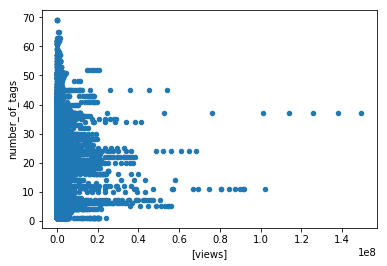

In [7]:
us_videos.plot(y="number_of_tags", x=["views"], kind="scatter")
us_videos['number_of_tags'].corr(us_videos['views'])

In [8]:
publishlist = us_videos.publish_time.tolist()
publishdatelist = {}
counter = 0
for item in publishlist:
    year = item[2:4]
    month = item[5:7]
    day = item[8:10]
    date = str.join('.', (year,day,month))
    publishdatelist[counter] = date
    counter +=1

In [9]:
publish = pd.DataFrame.from_dict(publishdatelist, orient='index')
publish.columns = ['publish_date']

In [10]:
df = pd.concat([us_videos, publish], axis=1)
df.head(20)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,tagssplitted,number_of_tags,average_tag_length,publish_date
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,[SHANtell martin],1,15.000000,17.13.11
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...","[last week tonight trump presidency, ""last wee...",4,25.500000,17.13.11
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,"[racist superman, ""rudy"", ""mancuso"", ""king"", ""...",23,13.652174,17.12.11
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,"[rhett and link, ""gmm"", ""good mythical morning...",27,17.666667,17.13.11
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,"[ryan, ""higa"", ""higatv"", ""nigahiga"", ""i dare y...",14,8.571429,17.12.11
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...,"[ijustine, ""week with iPhone X"", ""iphone x"", ""...",7,13.571429,17.13.11
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...,"[SNL, ""Saturday Night Live"", ""SNL Season 43"", ...",42,12.428571,17.12.11
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....,"[5 Ice Cream Gadgets, ""Ice Cream"", ""Cream Sand...",13,18.384615,17.12.11
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th...","[Trailer, ""Hugh Jackman"", ""Michelle Williams"",...",28,17.142857,17.13.11
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo...","[vox.com, ""vox"", ""explain"", ""shift change"", ""f...",20,13.550000,17.13.11


In [52]:
from datetime import datetime
from dateutil.parser import parse

pubdate1 = [x.replace(".", "-") for x in df.publish_date]
pubdate2 = [('20'+ x) for x in pubdate1]
pubdate = [datetime.strptime(x, '%Y-%d-%m') for x in pubdate2]

trendate1 = [x.replace(".", "-") for x in df.trending_date]
trendate2 = [('20'+ x) for x in trendate1]
trendate = [datetime.strptime(x, '%Y-%d-%m') for x in trendate2]

differance = []
for x in range(len(trendate)):
    differance.append((trendate[x] - pubdate[x]).days)

differance

[1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2361,
 1,
 8,
 4,
 2,
 2,
 207,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 3,
 3,
 2,
 1,
 4,
 1,
 4,
 3,
 2,
 3,
 4,
 3,
 4,
 3,
 2,
 1,
 3,
 3,
 1,
 4,
 4,
 2,
 4,
 3,
 4,
 1,
 4,
 5,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 28,
 3,
 4,
 4,
 2,
 3,
 3,
 5,
 5,
 3,
 4,
 2,
 4,
 2,
 5,
 5,
 4,
 4,
 4,
 5,
 4,
 5,
 5,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 5,
 5,
 6,
 5,
 4,
 5,
 4,
 908,
 5,
 4,
 5,
 2424,
 4,
 5,
 4,
 5,
 5,
 5,
 5,
 4,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 1983,
 5,
 5,
 6,
 5,
 228,
 6,
 5,
 5,
 5,
 6,
 6,
 5,
 4,
 32,
 5,
 5,
 6,
 4,
 6,
 10,
 7,
 5,
 5,
 5,
 7,
 5,
 5,
 6,
 7,
 6,
 5,
 6,
 5,
 6,
 6,
 6,
 5,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 3,
 1,
 1,
 0,
 2,
 2,
 1,
 2

In [55]:
df['time_to_trending'] = differance

-0.066059958419457512

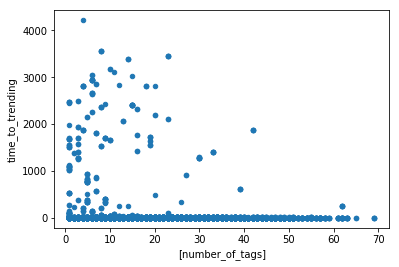

In [63]:
df.plot(y="time_to_trending", x=["number_of_tags"], kind="scatter")
df['time_to_trending'].corr(df['number_of_tags'])